# Data Exploration

In [42]:
import pandas as pd

In [45]:
storage_path = "../../data/processed/historical_kba_data.parquet"
df = pd.read_parquet(storage_path, engine='fastparquet')
df["ts_key_size"] = df.groupby('ts_key')['ts_key'].transform('size')

# FIlter ts_keys with at least 12 entries
df = df[df['ts_key_size'] >= 12].copy()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231938 entries, 1745 to 356
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   OEM          231938 non-null  object        
 1   Model        231938 non-null  object        
 2   drive_type   231938 non-null  object        
 3   Value        231938 non-null  float64       
 4   Date         231938 non-null  datetime64[ns]
 5   ts_key       231938 non-null  object        
 6   ts_key_size  231938 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 14.2+ MB


In [47]:
df.drive_type.unique()

array(['All_Wheel_Drive', 'Convertibles', 'Diesel', 'Electric_BEV',
       'Hybrid', 'Petrol', 'Total'], dtype=object)

In [48]:
df.Date.describe()

count                           231938
mean     2022-01-24 05:13:28.571255808
min                2018-01-31 00:00:00
25%                2019-12-31 00:00:00
50%                2022-02-28 00:00:00
75%                2024-01-31 00:00:00
max                2025-10-31 00:00:00
Name: Date, dtype: object

In [49]:
df.groupby('ts_key').size().describe()

count    3745.000000
mean       61.932710
std        30.171771
min        12.000000
25%        33.000000
50%        66.000000
75%        94.000000
max        94.000000
dtype: float64

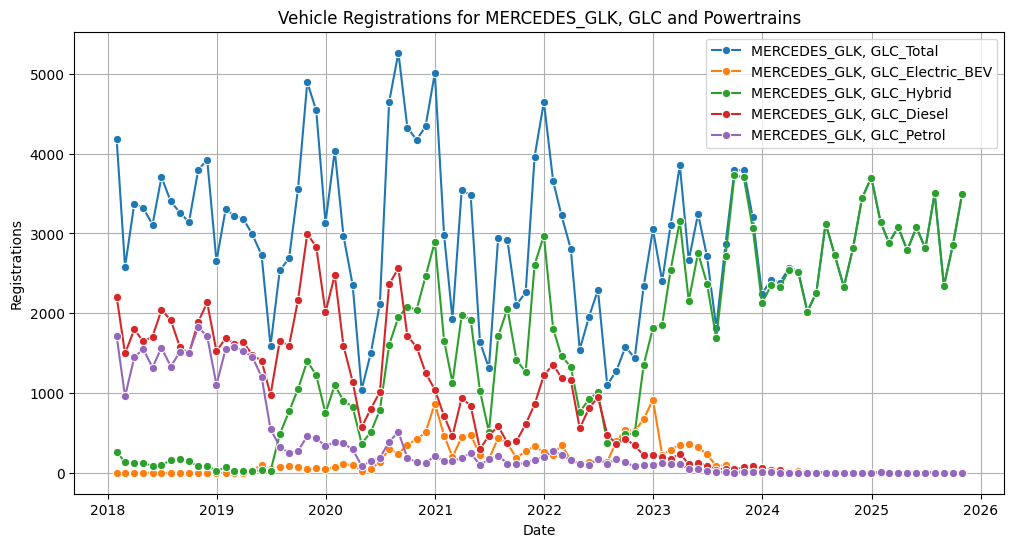

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

model = 'MERCEDES_GLK, GLC'

timeseries_key_list = [ f'{model}_Total', f'{model}_Electric_BEV',
                       f'{model}_Hybrid', f'{model}_Diesel', f'{model}_Petrol']

time_col = 'Date'

plt.figure(figsize=(12, 6))

for ts_key in timeseries_key_list:
    df_subset = df[df['ts_key'] == ts_key].copy()
    if not df_subset.empty:
        df_subset = df_subset.sort_values(by=time_col)
        sns.lineplot(data=df_subset, x=time_col, y='Value', marker='o', label=ts_key)
    else:
        print(f"No data found for {ts_key}")

plt.title(f'Vehicle Registrations for {model} and Powertrains')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.legend()
plt.grid(True)
plt.show()



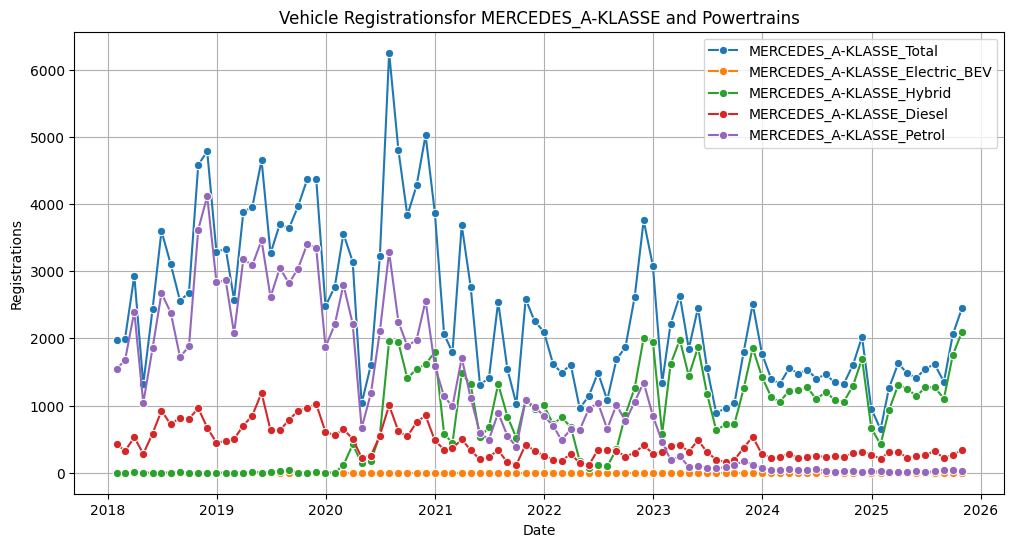

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

model = 'MERCEDES_A-KLASSE'

timeseries_key_list = [f'{model}_Total', f'{model}_Electric_BEV',
                       f'{model}_Hybrid', f'{model}_Diesel', f'{model}_Petrol']

time_col = 'Date'

plt.figure(figsize=(12, 6))

for ts_key in timeseries_key_list:
    df_subset = df[df['ts_key'] == ts_key].copy()
    if not df_subset.empty:
        df_subset = df_subset.sort_values(by=time_col)
        sns.lineplot(data=df_subset, x=time_col, y='Value', marker='o', label=ts_key)
    else:
        print(f"No data found for {ts_key}")

plt.title(f'Vehicle Registrationsfor {model} and Powertrains')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.legend()
plt.grid(True)
plt.show()



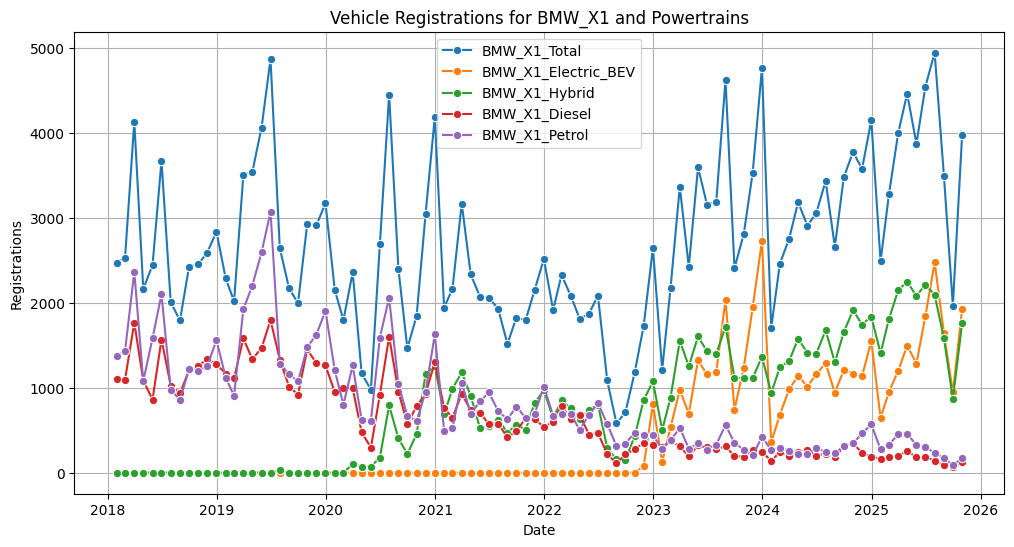

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

model = 'BMW_X1'

timeseries_key_list = [f'{model}_Total', f'{model}_Electric_BEV', 
                       f'{model}_Hybrid', f'{model}_Diesel', f'{model}_Petrol']

time_col = 'Date'

plt.figure(figsize=(12, 6))

for ts_key in timeseries_key_list:
    df_subset = df[df['ts_key'] == ts_key].copy()
    if not df_subset.empty:
        df_subset = df_subset.sort_values(by=time_col)
        sns.lineplot(data=df_subset, x=time_col, y='Value', marker='o', label=ts_key)
    else:
        print(f"No data found for {ts_key}")

plt.title(f'Vehicle Registrations for {model} and Powertrains')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.legend()
plt.grid(True)
plt.show()



In [61]:
df_subset

,OEM,Model,drive_type,Value,Date,ts_key,ts_key_size
358,BMW,X1,Petrol,1372.0,2018-01-31,BMW_X1_Petrol,94
364,BMW,X1,Petrol,1435.0,2018-02-28,BMW_X1_Petrol,94
376,BMW,X1,Petrol,2365.0,2018-03-31,BMW_X1_Petrol,94
383,BMW,X1,Petrol,1079.0,2018-04-30,BMW_X1_Petrol,94
385,BMW,X1,Petrol,1582.0,2018-05-31,BMW_X1_Petrol,94
...,...,...,...,...,...,...,...
481,BMW,X1,Petrol,300.0,2025-06-30,BMW_X1_Petrol,94
488,BMW,X1,Petrol,236.0,2025-07-31,BMW_X1_Petrol,94
494,BMW,X1,Petrol,176.0,2025-08-31,BMW_X1_Petrol,94
504,BMW,X1,Petrol,91.0,2025-09-30,BMW_X1_Petrol,94
